# Proyecto Final Introducción a la Ciencia de Datos con Python
# Martínez Pardo Esaú

## Identificar la relación entre las horas de estudio y las calificaciones.

In [ ]:
!pip install seaborn

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [46]:
# Carga el dataset proporcionado.
df = pd.read_csv('/content/Esaú Martínez Pardo - linear_regression_data.csv')
df

,Horas de Estudio,Calificación
0,4.370861,22.289541
1,9.556429,46.287107
2,7.587945,38.398531
3,6.387926,22.001787
4,2.404168,10.922479
...,...,...
95,5.444160,23.141750
96,5.704595,28.137469
97,4.847869,25.945106
98,1.228772,7.527315


In [47]:
# Intercambio el nombre de las columnas
df.columns = ['Calificación', 'Horas de Estudio']
df

,Calificación,Horas de Estudio
0,4.370861,22.289541
1,9.556429,46.287107
2,7.587945,38.398531
3,6.387926,22.001787
4,2.404168,10.922479
...,...,...
95,5.444160,23.141750
96,5.704595,28.137469
97,4.847869,25.945106
98,1.228772,7.527315


<Axes: xlabel='Horas de Estudio', ylabel='Calificación'>

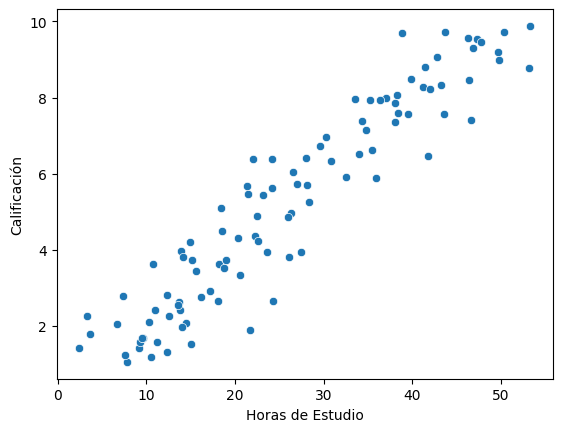

In [48]:
# Realiza un gráfico de dispersión entre las columnas Horas de Estudio y Calificación.
sns.scatterplot(data =  df, x = 'Horas de Estudio', y = 'Calificación')

In [51]:
# Haz un análisis de correlación entre las variables por medio de heatmaps o pairplots.
df['Calificación'].corr(df['Horas de Estudio'])

np.float64(0.9422976727329103)

<Axes: >

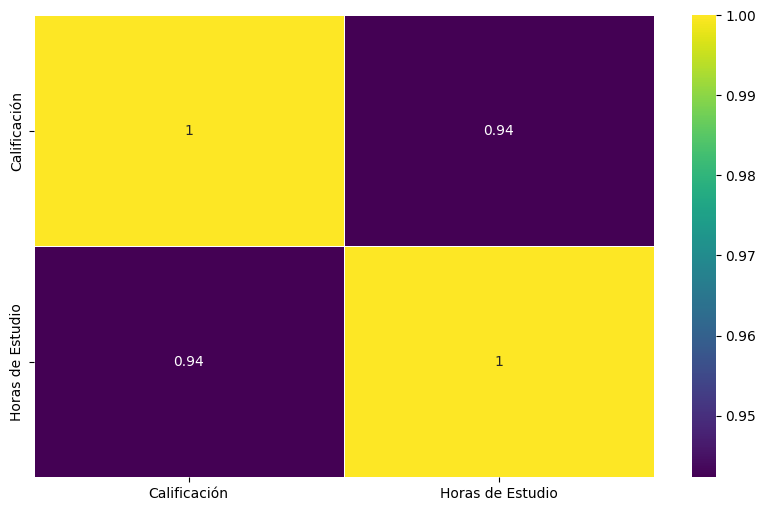

In [52]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, linewidths=.5,cmap='viridis')

<Axes: >

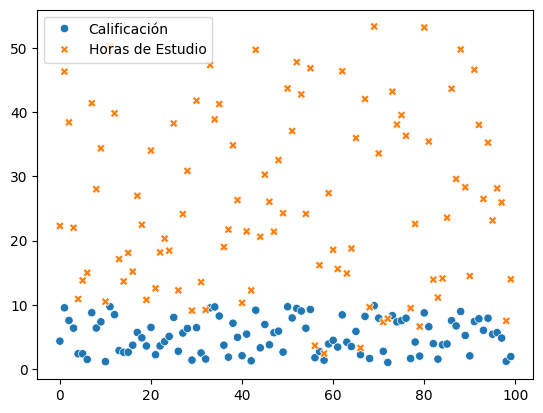

In [53]:
# Ajusta una línea de regresión y visualízala sobre el gráfico.
sns.scatterplot(df)

In [54]:
lr = LinearRegression()
# Definimos las variables independiente (X) y dependiente (y)
i_x = df['Horas de Estudio']
d_y = df['Calificación']
lr.fit(i_x.to_frame(), d_y)


LinearRegression()

Hasta este punto ya se encontró la mejor recta. "Tenemos el mejor valor para 'm' y para 'b'

In [55]:
# Usando nuestro modelo entrenado, usamos de nuevo nuestra variable x para intentar predecir y
y_predict = lr.predict(i_x.to_frame())

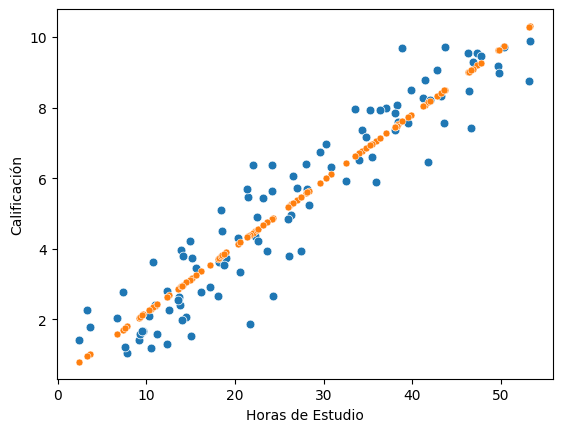

In [56]:
# Datos originales (azul)
sns.scatterplot(x = i_x, y = d_y, s=40);
# Datos mejorados (naranja)
sns.scatterplot(x = i_x, y = y_predict, s=25);

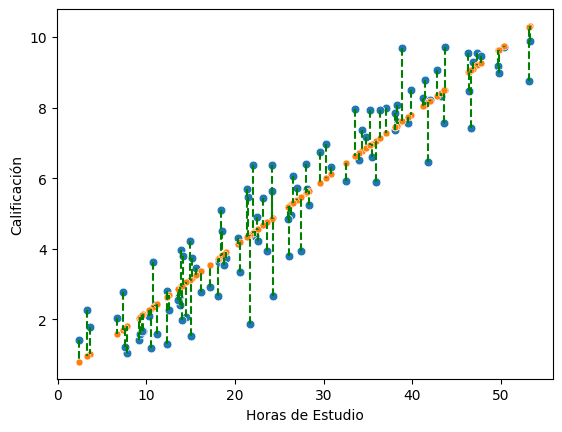

In [59]:
# Calcular distancia entre puntos naranjas y azules
sns.scatterplot(x = i_x, y = d_y, s=40);
sns.scatterplot(x = i_x, y = y_predict, s=25);

for i in range(len(i_x)):
    plt.plot([i_x[i], i_x[i]], [d_y[i], y_predict[i]], 'g--')

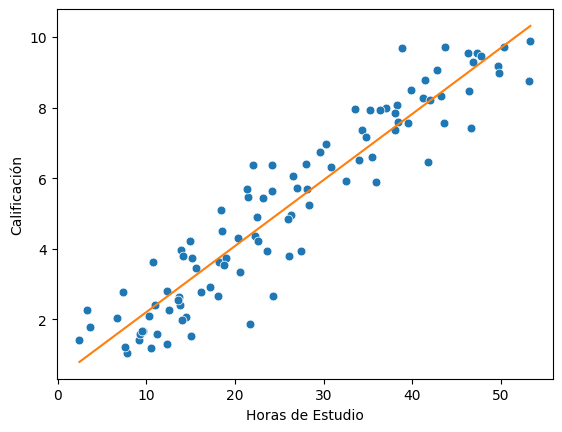

In [60]:
# Formamos la línea con los puntos naranja
sns.scatterplot(x = i_x, y = d_y, s=40);
sns.lineplot(x = i_x, y = y_predict, color='#FF7F0E');

In [61]:
# Extraemos la ecuación de la recta
intercept = lr.intercept_ #b
coefficient = lr.coef_[0] #m

In [62]:
# Ecuación que calcula el modelo de machine learning
print(f'y = {coefficient} * x + {intercept}')

y = 0.18714547865919645 * x + 0.33726120729779385


In [63]:
# Comprobamos resultados
print(f'Valor de x: {i_x[10]}')
print(f'Valor predecido por nuestro modelo: {y_predict[10]}') # modelo machine learning
print(f'Valor cuantificado directamente usando la funcion: {coefficient * i_x[10] + intercept}') # ecuación

Valor de x: 10.50331283182148
Valor predecido por nuestro modelo: 2.302908714716305
Valor cuantificado directamente usando la funcion: 2.302908714716305


In [64]:
# Revisa la R^2 del resultado y explica.
# Analizar el resultado original con el de machine learning y que me diga que tan correlaciones están los valores
# que esperaba con los que obtuve
# Método a mano
print(f'R2: {np.power(i_x.corr(d_y), 2)}')

R2: 0.8879249040378592


In [65]:
# Calculo usando el método scrore de machine learning
print(f'R2: {lr.score(i_x.to_frame(), d_y)}')

R2: 0.8879249040378584


Responde: ¿Existe una relación positiva entre las horas de estudio y las calificaciones?

Sí, mientras más estudies, obtienes una mayor calificación. Eso lo podemos ver en la gráfica anterior, en donde se pinta una pendiente positiva. En la gráfica de dispersión, los puntos tienden a alinearse en una dirección ascendente. La pendiente positiva de la línea de regresión nos dice que a medida que aumentan las horas de estudio, también tienden a incrementarse las calificaciones.

## Agrupar clientes en función de sus ingresos mensuales y su gasto anual.

In [67]:
# Carga el dataset proporcionado.
d_f = pd.read_csv('/content/Esaú Martínez Pardo - kmeans_data.csv')
d_f

,Ingresos Mensuales,Gasto Anual
0,3006.500946,12180.301116
1,2867.671583,14080.253750
2,3312.833674,8714.263665
3,2464.553751,10723.708623
4,2888.268607,11071.000741
...,...,...
145,12614.166700,52272.523130
146,11469.498852,48272.545278
147,11724.948303,43094.236506
148,10484.808938,54100.622802


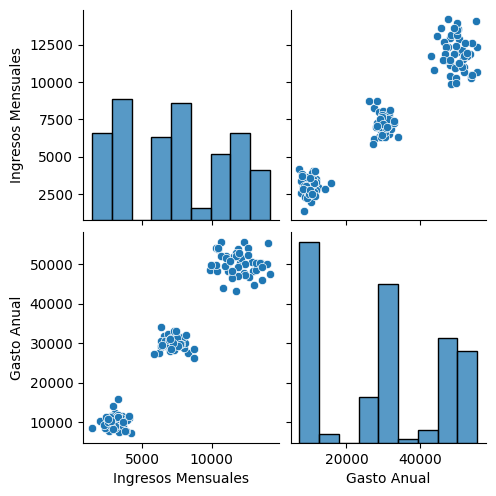

In [68]:
# Realiza un gráfico de dispersión entre las columnas Ingresos Mensuales y Gasto Anual.
sns.pairplot(d_f)

<Axes: xlabel='Ingresos Mensuales', ylabel='Gasto Anual'>

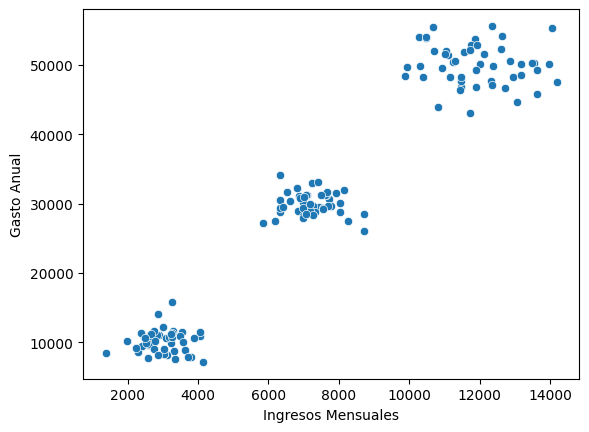

In [69]:
# CORREGIDO EL PASO ANTERIOR
sns.scatterplot(data =  d_f, x = 'Ingresos Mensuales', y = 'Gasto Anual')

In [70]:
from sklearn.cluster import KMeans


In [71]:
# Aplica el algoritmo K-Means con k=3.
# Agrupamos en 3 clusters
k_means = KMeans(n_clusters=3, max_iter=10000)

In [72]:
# Entrenamos el algoritmo
k_means.fit(d_f[['Ingresos Mensuales', 'Gasto Anual']])

KMeans(max_iter=10000, n_clusters=3)

In [73]:
# Localizamos la ubicación de los 3 puntos
centers = k_means.cluster_centers_

centers

array([[11905.21102139, 50031.38934917],
       [ 7225.84784597, 29888.55855036],
       [ 2987.65923094, 10147.64283482]])

In [74]:
# Grafica los datos agrupados según los clusters generados.

# Clasificamos los datos para que se vean más claros los grupos
clasificaciones = k_means.predict(d_f[['Ingresos Mensuales', 'Gasto Anual']])


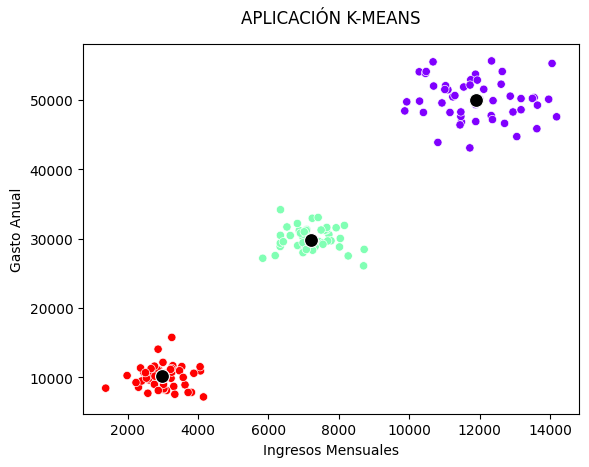

In [75]:
# Graficamos coloreando cada grupo de un distinto color
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('APLICACIÓN K-MEANS', pad=15)
ax.set_xlabel('Ingresos Mensuales')
ax.set_ylabel('Gasto Anual')

sns.scatterplot(x = d_f['Ingresos Mensuales'], y = d_f['Gasto Anual'], ax=ax, hue=clasificaciones, palette='rainbow');
sns.scatterplot(x = centers[:,0], y = centers[:,1], ax=ax, s=100, color='black');

ax.get_legend().remove()

Responde: ¿Qué características comunes tienen los clientes en cada grupo?

Las personas con menores ingresos mensuales, tienden a gastar menos, es decir, es proporcional su ingreso con su gasto: reciben menos ingresos-gastan menos / reciben más ingresos - gastan más.
Por ejemplo, el grupo 'verde' tiene de 2000 a 4000 de ingresos mensuales, por lo que suelen gastar menos de 20000 anualmente. La pendiente sube con los de ingresos de 6000 a 8000 mensuales, gastan más los 'rojos' que los 'verdes' (de 25000 a 30000). Finalmente vemos al cluster 'morado' en la esquina superior derecha de la gráfica, como reciben más ingresos que los demás grupos (11000 a 14000), gastan más dinero, de 40000 a más de 50000, pues suponemos que tienden a tener un estilo de vida más elevado.